In [8]:
import sys
!"{sys.executable}" -m pip install pandas matplotlib numpy


  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.0 MB 14.5 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.0 MB 17.0 MB/s eta 0:00:01
   -------------------------------------- - 10.5/11.0 MB 18.3 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 17.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----------------------- ---------------- 4.7/8.1 MB 23.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 23.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   -------------------- ------------------- 6.6/12.8 MB 30.6

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import sys
print(sys.executable)
print(sys.version)


c:\Users\ayaan\AppData\Local\Programs\Python\Python313\python.exe
3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

kal = pd.read_csv("mpu_data_kalman_output.csv")
fused = pd.read_csv("mpu_data_fused.csv")

for df in (kal, fused):
    df.columns = df.columns.str.strip().str.lower()




In [2]:
df = pd.merge(
    kal[["time", "roll_filtered", "pitch_filtered"]],
    fused[[
        "time",
        "roll_fused",
        "pitch_fused",
        "roll_ekf",
        "pitch_ekf",
        "roll_madgwick",
        "pitch_madgwick"
    ]],
    on="time"
)

df.head()



,time,roll_filtered,pitch_filtered,roll_fused,pitch_fused,roll_ekf,pitch_ekf,roll_madgwick,pitch_madgwick
0,1021.342,-0.000143,-0.000219,-38.448663,-14.829377,-76.897035,-29.657482,-0.000291,-0.001272
1,1021.398,-0.087705,0.022240,-51.524931,-20.073404,-102.879654,-39.578254,-0.170208,-0.568555
2,1021.455,-0.256378,-0.056392,-58.223769,-23.064771,-116.111282,-44.915941,-0.336256,-1.213601
3,1021.511,-0.519125,-0.171341,-62.506759,-25.030746,-124.506789,-48.212386,-0.506730,-1.849105
4,1021.567,-0.858426,-0.291640,-65.541995,-26.548114,-130.421753,-50.644107,-0.662238,-2.452120


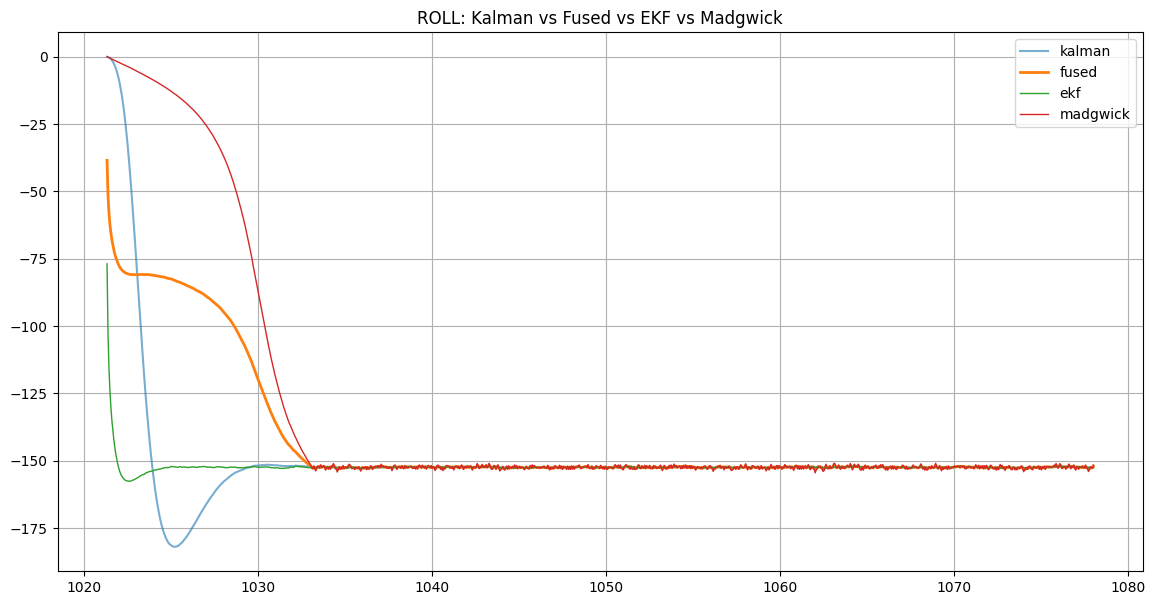

In [3]:
t = df["time"]

plt.figure(figsize=(14,7))
plt.plot(t, df["roll_filtered"], alpha=0.6)
plt.plot(t, df["roll_fused"], linewidth=2)
plt.plot(t, df["roll_ekf"], linewidth=1)
plt.plot(t, df["roll_madgwick"], linewidth=1)

plt.title("ROLL: Kalman vs Fused vs EKF vs Madgwick")
plt.grid(True)
plt.legend(["kalman", "fused", "ekf", "madgwick"])

plt.show()


In [4]:
def mse(a, b): 
    return np.mean((a - b)**2)

print("ROLL MSE (kalman vs fused):", mse(df["roll_filtered"], df["roll_fused"]))
print("ROLL MSE (kalman vs ekf):", mse(df["roll_filtered"], df["roll_ekf"]))
print("ROLL MSE (kalman vs madgwick):", mse(df["roll_filtered"], df["roll_madgwick"]))

print("PITCH MSE (kalman vs fused):", mse(df["pitch_filtered"], df["pitch_fused"]))
print("PITCH MSE (kalman vs ekf):", mse(df["pitch_filtered"], df["pitch_ekf"]))
print("PITCH MSE (kalman vs madgwick):", mse(df["pitch_filtered"], df["pitch_madgwick"]))



ROLL MSE (kalman vs fused): 756.0843274057036
ROLL MSE (kalman vs ekf): 537.0156635608257
ROLL MSE (kalman vs madgwick): 2296.26485056426
PITCH MSE (kalman vs fused): 39.758405372302484
PITCH MSE (kalman vs ekf): 81.69574823859078
PITCH MSE (kalman vs madgwick): 59.1011032510193
